In [1]:
import sys
sys.path.append('c:\\Users\\Admin\\few_shot_learning\\')

from Utils.Class import Predictor, FSL, Random, Nearest_Neighbour
from Utils.saveLoad import save_data, load_data
from Utils import preprocess, testModels, buildModel, utils

import numpy as np
import os
import random

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf

from keras.models import load_model, save_model

from keras.callbacks import History 

from keras.optimizers import Adam
from keras import backend as K

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
kwargs = {'train_pairs' : True,
          'train_labels' : True,
          'val_pairs' : True,
          'val_labels' : True}

data = load_data(path="D://", **kwargs)

train_pairs loaded from /D://train_pairs.h5!
train_labels loaded from /D://train_labels.h5!
val_pairs loaded from /D://val_pairs.h5!
val_labels loaded from /D://val_labels.h5!


In [3]:
model = buildModel.get_pretrained_model(input_shape=(200, 280, 3), num_dense=2, dense_size=(1024,512))
model.summary()

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
vgg16 True
module_wrapper True
dense True
dense_1 True
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 280, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 200, 280, 3) 0                                            
________________________________________________________________________________________

In [4]:
val_inputs = [data['val_pairs'][:,0], data['val_pairs'][:,1]]
train_inputs = [data['train_pairs'][:,0], data['train_pairs'][:,1]]

In [5]:
model.load_weights('models/vgg16_aircraft/vgg16_aircraft_weights')

In [12]:
optimizer = Adam(learning_rate = 1e-6, clipnorm=1e-4)
model.compile(loss = "binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
hist = History()

In [13]:
model.optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-06>

In [14]:
model.fit(train_inputs, data['train_labels'][:], batch_size=128, epochs=20, callbacks=[buildModel.EarlyStoppingAtMinLoss(patience=4, val_inputs=val_inputs, val_labels=data['val_labels'][:]), hist])

Epoch 1/20
174/174 [==============================] - 234s 1s/step - loss: 0.0230 - accuracy: 0.9968

Evaluating model on validations set
597/597 [==============================] - 90s 139ms/step - loss: 0.2629 - accuracy: 0.9148
Epoch 2/20



174/174 [==============================] - 220s 1s/step - loss: 0.0214 - accuracy: 0.9967

Evaluating model on validations set
597/597 [==============================] - 84s 141ms/step - loss: 0.2647 - accuracy: 0.9151
Epoch 3/20



174/174 [==============================] - 242s 1s/step - loss: 0.0222 - accuracy: 0.9963

Evaluating model on validations set
597/597 [==============================] - 97s 163ms/step - loss: 0.2662 - accuracy: 0.9152
Epoch 4/20



174/174 [==============================] - 259s 1s/step - loss: 0.0219 - accuracy: 0.9961

Evaluating model on validations set
597/597 [==============================] - 99s 166ms/step - loss: 0.2669 - accuracy: 0.9158
Epoch 5/20



174/174 [==============================] - 265s 2s/step -

In [19]:
with open('plots/LC_vgg16_aircraft.txt', 'r') as f:
    contents = f.read()
    hist_dict = eval(contents)
for k, v in hist.history.items():
    hist_dict[k] = (hist_dict[k][:15 + hist.history[k])[:]
# with open('plots/LC_vgg16_aircraft.txt', 'w') as f:
#     f.write(str(hist_dict)) 

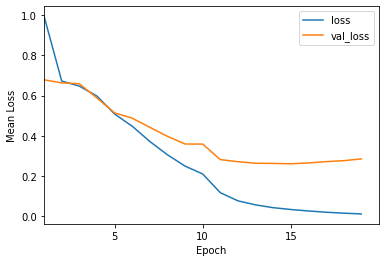

In [20]:
X = range(1, len(hist_dict['loss']) + 1)
for k, v in hist_dict.items():
    if 'loss' in k:
        plt.plot(X, v, label=k)

plt.xlabel('Epoch')
plt.xticks(range(0, len(hist_dict['loss']) + 1, 5))
plt.xlim(X[0], X[-1]+1)

plt.ylabel('Mean Loss')
plt.legend()
plt.savefig('plots/LC_vgg16_aircraft.pdf')
plt.show()
    

trained for 15 epochs

In [41]:
model.save_weights('models/vgg16_aircraft/weights')